# Usando o Jupyter Notebook para análise de dados (método II)

O propósito desse _notebook_ é apresentar as principais funções e ferramentas que podem ser usadas para realizar a análise de dados experimentais deste curso. Para isso será necessário um conhecimento mínimo de Python (versão 3). Esse documento foi produzido e testado usando um _kernel_ de Python 3, então use-o da mesma maneira, pois não há garantia alguma de que as funções e ferramentas apresentadas aqui funcionem em uma versão anterior de Python.

Sempre que possível será apresentada a sintaxe de python a ser utilizada com um exemplo executável. A seqüência apresentada neste _notebook_ será denominada de **método II**.

## Por que Python?

Se você já domina python ou pelo menos já fez qualquer coisa nesta linguagem além de um _hello world_, pode pular esta seção.

Python 3 é uma linguagem de programação de alto nível. Ela tem sido usada de maneira crescente na _indústria_ da ciência de dados em atividades como _machine learning_ e _neural networks_. Na comunidade de física de altas energias a utilização de Python para a análise de dados também tem crescido significativa e continuamente. Portanto, para próxima década, dominar o uso de python pode deixar de ser uma vantagem para se tornar uma necessidade.

Existem inúmeros cursos gratuitos de python (coursera, IBM, etc). Aponto uma pequena coleção deste cursos [aqui](https://itmidia.com/5-cursos-gratuitos-para-quem-quer-comecar-a-programar-em-python/). Sugiro ainda que se use o [tutorial da w3schools](https://www.w3schools.com/python/default.asp), pois além de existir um acesso rápido a vários elementos da sintaxe da linguagem, ele tem alguns exercícios _online_ simplificados que podem ajudar nos primeiros passos

## Primeiro passo: carregando módulos do Python 3

Neste ponto você já sabe do _minimum minimorum_ de python para saber que ele tem seu desempenho melhorado significativamente com o uso dos módulos (_modules_) que nada mais são do que bibliotecas desenvolvidas pela comunidade de usuários e desenvolvedores do python. Eles tem em geral propósitos específicos para facilitar a resolução de classes de problemas bem definidos.
Alguns dos módulos que usaremos são o [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/), [scipy](https://www.scipy.org/), [sklearn](https://scikit-learn.org/stable/) e [sympy](https://www.sympy.org/en/index.html). 

A importação de módulos não é como acontece com a importação de _header files_ em programas em C/C++, que precisam ser declaradas logo no início do programa. No caso do python pode-se importar o módulo apenas no ponto do programa a partir do qual precisaremos dele. Então aqui iremos importar alguns que serão frequentemente usados.

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 

## Segundo passo: introduzindo os dados experimentais

Poderíamos em princípio colocar os dados num arquivo .csv e importá-lo usando pandas. Mas como em geral os conjuntos de dados dos experimentos deste curso são pequenos (tipicamente menos de 10 linhas), seria uma nova potencial fonte de erro no processo de análise e o ganho não chegaria a compensar o risco.

Comecemos com um exemplo onde temos um conjunto de dados que foi obtido de um experimento da _Lei de Boyle-Mariotte_ e colocados na tabela abaixo. Esses são dados reais retirados da disciplina de Fenômenos Térmicos e representam a pressão manométrica (${\rm P}_m$) e o volume (V) de um gás (ar) num cilindro com suas respectivas incertezas. Para mais informações veja a **referência 1**.

${\rm P}_m$ (kgf/cm$^2$)|	$\sigma_{{\rm P}_m}$ (kgf/cm$^2$)	| V (cm$^3$)	| $\sigma_{\rm V}$ (cm$^3$)
:-:|:-:|:-:|:-:
0.0 | 0.01	| 13.00	| 0.05
0.1	| 0.01	| 12.10 | 0.05
0.2	| 0.01	| 11.10	| 0.05
0.3	| 0.01	| 10.10	| 0.05
0.4	| 0.01	| 9.40	| 0.05
0.5	| 0.01	| 8.60	| 0.05
0.6	| 0.01	| 8.10	| 0.05
0.7	| 0.01	| 7.50	| 0.05
0.8	| 0.01	| 7.10	| 0.05

Uma possibilidade de se fazer isso é usando listas (_list_), dicionários (_dict_) e por fim _pandas dataframe_. Lembrando que a sintaxe para listas é dado, por exemplo, para N valores _float_:

lista1 = \[num1, num2,...,numN\] 

E um dicionário com _M_ chaves pode ser criado como 

my_dict = \{'chave1' : valor1, 'chave2' : valor2,..., 'chaveM' : valorM \}

onde os tipos de variáveis das diferentes chaves e valores podem ser quaisquer (_int, float,string_) e inclusive _list_. 

Assim criamos uma lista (_list_ ) para cada coluna de dados, por exemplo:
x = \[2.7, 4.9, 6.6, 8.8, 10.9,13.0\]
Neste **método II** usaremos _dataframes_ **pandas** e **scipy**.


In [2]:
x = [13.0,12.1,11.1,10.1,9.4,8.6,8.1,7.5,7.1]
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
incy = [0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02]
incx = [0.05,0.07,0.05,0.05,0.07,0.08,0.06,0.09,0.09]

Agora criamos um dicionário onde os títulos das colunas será a chave (em formato texto ou _string_) e os valores serão as respectivas listas:

In [3]:
dados = {'V(cm3)' : x, 'P_m(kgf/cm2)' : y, 'inc-x(cm3)': incx, 'inc-y(kgf/cm2)': incy}
dados

{'V(cm3)': [13.0, 12.1, 11.1, 10.1, 9.4, 8.6, 8.1, 7.5, 7.1],
 'P_m(kgf/cm2)': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
 'inc-x(cm3)': [0.05, 0.07, 0.05, 0.05, 0.07, 0.08, 0.06, 0.09, 0.09],
 'inc-y(kgf/cm2)': [0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02]}

Por fim alimentamos o dicionário como um _dataframe_ do _pandas_ :

In [4]:
# Convert the dictionary into DataFrame 
df = pd.DataFrame(dados)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,V(cm3),P_m(kgf/cm2),inc-x(cm3),inc-y(kgf/cm2)
0,13.0,0.0,0.05,0.01
1,12.1,0.1,0.07,0.01
2,11.1,0.2,0.05,0.01
3,10.1,0.3,0.05,0.01
4,9.4,0.4,0.07,0.02
5,8.6,0.5,0.08,0.02
6,8.1,0.6,0.06,0.02
7,7.5,0.7,0.09,0.02
8,7.1,0.8,0.09,0.02


Podemos inicialmente colocar os dados num gráfico para fazer uma primeira visualização exploratória. Para isso usamos o _pyplot_ do _matplotlib_ para graficar os pontos com suas respectivas barras de erro.

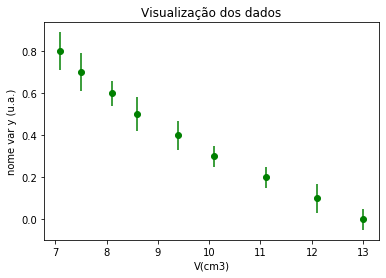

In [5]:
# visualizando os dados pelo gráfico

plt.figure() 
#plt.errorbar(x, y, incy, incx,'og')
#atenção aqui: a ordem é x, y, incerteza de Y, incerteza de X
plt.errorbar(df['V(cm3)'], df['P_m(kgf/cm2)'], df['inc-x(cm3)'], df['inc-y(kgf/cm2)'],'og')
plt.title("Visualização dos dados")
#incluindo título diretamente do nome da coluna da tabela
plt.xlabel(df['V(cm3)'].name)
#incluindo o nome à mão
plt.ylabel("nome var y (u.a.)")
plt.show()


Podemos observar que a relação não é linear. Para se fazer um ajuste pelo método dos mínimos quadrados (MMQ) devemos conhecer - ou ao menos modelar - a dependência de y em relação a x (por exemplo, campo elétrico em função da distância). De posse dessa forma funcional é possível aplicar uma linearização aos dados e então sobre o resultado da linearização é possível se fazer um ajuste linear usando MMQ.

## Linearização dos dados

No caso do exemplo os dados foram obtidos de um experimento da disciplina de Fenômenos Térmicos. O experimento era sobre a lei de Boyle ($P=\frac{const.}{V}$, portanto nosso modelo se assemlha a:
$$ y=\frac{a}{x} + b $$
Assim, para linearizarmos os dados precisamos criar uma nova variável que armazene o inverso dos valores medidos de x:
$$ z = \frac{1}{V} $$
Assim, nosso dados se transforma na seguinte forma funcional:
$$ y=az+b $$
O que é uma equação de reta. Assim feito podemos realizar o ajuste linear.
Para proceder a linearização em python é bastante simples. Para isso usamos a função _power_ do **numpy** como colocado a seguir.

In [6]:
#linearizando a sequência de valores de x usando numpy
z = np.power(df['V(cm3)'],-1)
z

0    0.076923
1    0.082645
2    0.090090
3    0.099010
4    0.106383
5    0.116279
6    0.123457
7    0.133333
8    0.140845
Name: V(cm3), dtype: float64

### Propagação das incertezas na linearização

Para a propagação das incertezas numa operação de linearização de maneira geral não basta apenas aplicar a mesma operação aos valores de incerteza da grandeza original para se obter os valores de incerteza para a nova variável. Neste caso precisamos sempre utilizar a propagação
$$ \sigma_z = \frac{\partial z}{\partial x}\sigma_x $$
Como no nosso caso $ z = 1/x $ então a propagação fica
$$ \sigma_z = \frac{1}{x^2}\sigma_x $$

De fato, os valores de incerteza tem que ser calculados para cada ponto. Em termos computacionais seria ótimo se pudéssemos simplesmente fazer:
$\sigma_z = \frac{1}{x^2}\sigma_x$
Felizmente os _dataframes_ do **pandas** nos permitem fazer isso de maneira trivial da seguinte forma:

In [7]:
#propagando a incerteza por conta da linearização
sigma_z = df['inc-x(cm3)']*np.power(df['V(cm3)'],-2)
sigma_z

0    0.000296
1    0.000478
2    0.000406
3    0.000490
4    0.000792
5    0.001082
6    0.000914
7    0.001600
8    0.001785
dtype: float64

## Visualizando a linearização

Em seguida podemos fazer a visualização dos dados após a linearização refazendo o gráfico com a variável z no lugar de x:

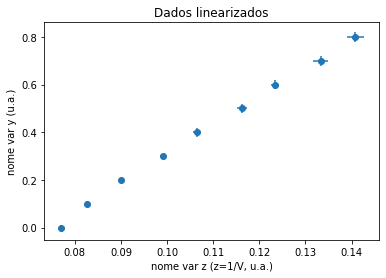

In [8]:
# visualizando os dados linearizados
plt.errorbar(z, df['P_m(kgf/cm2)'], df['inc-y(kgf/cm2)'],sigma_z,'o')
plt.title("Dados linearizados")
plt.xlabel("nome var z (z=1/V, u.a.)")
plt.ylabel("nome var y (u.a.)")
plt.show()

## MMQ com $ \chi^2 $

Em um ajuste por regressão linear no modo mais simples não se utilizam incertezas associadas aos pontos e também não se obtém as incertezas nos parâmetros ajustados (ou matriz covariância). Além disso utiliza-se como medida da qualidade de ajuste a variável $ R^2 $, que na verdade é uma estimativa de quanto dos dados pode ser descrito pelo modelo/função ajustado(a). Ela é também o quadrado da correlação de Pearson. Em geral se diz que quanto mais próximo de 1 é  $ R^2 $ melhor é o ajuste, mas se for realizado o cálculo de $ R^2 $ para um ajuste a uma grandeza constante o valor será muito próximo de zero, mesmo que se tenha um ajuste bastante verossímil.
Para se obter um ajuste de MMQ que tenha significado probabilístico - ou seja tenha um resultado de $ \chi^2 $ associado - é preciso que se informe ao método de ajuste as incertezas dos pontos experimentais. No caso do ajuste por MMQ somente as incertezas na variável dependente (y) é que são aceitas, portanto se as incertezas em x não são desprezíveis é preciso propagá-las para y. Para uma explicação detalhada do procedimento, verifique a **referência 1**. 

Para essa propagação completa é preciso fazer:
$$ (\sigma_y)^2= (\sigma_{y_0})^2 + \left(\frac{dy}{dx}\sigma_x \right)^2$$
onde $\sigma_{y_0}$ corresponde à incerteza original de y (aquela que vem da própria medida) e $\frac{dy}{dx}$ pode ser aproximado pelo coeficiente angular de um ajuste linear aos dados. Neste exemplo, $\sigma_x$ é a variável sigma_z.
Para o coeficiente angular podemos realizar uma regressão linear simples (RLS) aos dados e usar com excelente precisão o valor do parâmetro correspondente obtido da RLS, sem se preocupar neste momento com a qualidade do ajuste.

Para fazer o ajuste com o _curve\_fit_ do **scipy** precisamos inicialmente definir o tipo funcional (modelo) como uma função de Python. Não chega a ser complicado, mas o ideal é ter pelo menos uma vez na vida visto como se declara uma função em Python. Mesmo assim, é possível apenas copiar o que está na próxima célula:

In [9]:
#criando a função 'linear'
def linear(x, a, b):
    return a * x + b

E agora realizamos o fit. Primeiro precisamos criar uma _numpy array_ para os dados de $y$ porque o _curve\_fit_ tem problemas para interpretar o formato _dataframe_ :

In [10]:
#criando numpy array para y 
yarray = np.array(df['P_m(kgf/cm2)'])
#ajustando a reta (RLS) para obter uma estimativa boa de dy/dx
f_de_z, cov_pars = curve_fit(linear, z, yarray)
#f_de_z: parâmetros do ajuste (ang., lin.); cov_pars: (matriz de cov)^(-1)
f_de_z

array([12.17255662, -0.91053118])

Para esse ajuste o coeficiente angular é o primeiro parâmetro do vetor f_de_z com o valor:

In [11]:
print("coeficiente angular: ", f_de_z[0])

coeficiente angular:  12.172556619533779


Com o coeficiente angular ($dy/dx$) pode-se então fazer a transferência de incertezas para o y:

In [12]:
#transferindo incerteza de z para y
print('incertezas em y (originais): ',df['inc-y(kgf/cm2)'])
incytransf = np.sqrt(np.power(f_de_z[0]*sigma_z,2)+np.power(df['inc-y(kgf/cm2)'],2)) 
np.set_printoptions(precision=3)
print('incertezas em y (novos val.):', incytransf)
#incremento % da transferência da incerteza de z para y
(incytransf/df['inc-y(kgf/cm2)']-1)*100

incertezas em y (originais):  0    0.01
1    0.01
2    0.01
3    0.01
4    0.02
5    0.02
6    0.02
7    0.02
8    0.02
Name: inc-y(kgf/cm2), dtype: float64
incertezas em y (novos val.): 0    0.010629
1    0.011570
2    0.011154
3    0.011645
4    0.022203
5    0.023945
6    0.022889
7    0.027916
8    0.029535
dtype: float64


0     6.287209
1    15.702305
2    11.535299
3    16.446291
4    11.017181
5    19.724721
6    14.446015
7    39.581348
8    47.673377
dtype: float64

É interessante visualizar novamente os pontos agora apenas com incertezas em y

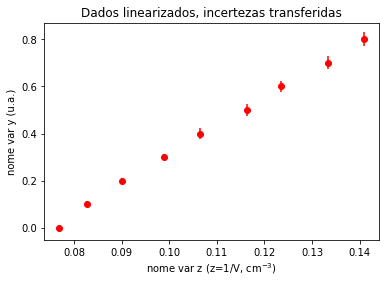

In [13]:
#plotando gráfico com as incertezas transferidas para a variável dependente (y), o 0 (zero) se refere a incertezas x
plt.errorbar(z, yarray, incytransf,0,'or')
plt.title("Dados linearizados, incertezas transferidas")
plt.xlabel("nome var z (z=1/V, cm$^{-3}$)")
plt.ylabel("nome var y (u.a.)")
plt.show()


Para se obter as incertezas é necessário obter o inverso da **matriz de covariância** do ajuste e a partir dela, os termos da sua diagonal principal. Esses termos correspondem às variâncias dos parâmetros de forma que (veja o capítulo 12 da **referência 2**):
$$\sigma_{p_j}^2=a_{jj}$$
onde os termos $a_{jj}$ correspondem a
$$ \mathcal{M}^{-1} = \begin{pmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{pmatrix}$$
No _curve\_fit_ do **scipy** a matriz obtida na célula seguinte ( _cov\_pars_ ) é a própria $\mathcal{M}^{-1}$

In [14]:
np.set_printoptions(precision=9)
fitpars, cov_pars = curve_fit(linear, z, yarray, sigma=incytransf)
print(fitpars)
cov_pars

[12.447139259 -0.93695852 ]


array([[ 0.099913885, -0.009376618],
       [-0.009376618,  0.000908015]])

**ATENÇÃO:** note que os parâmetros do ajuste **mudaram** quando as incertezas foram utilizadas como _pesos_ no ajuste.

Portanto os coeficientes angular e linear, com respectivas incertezas são:

In [15]:
p_0 = fitpars[0] #coef ang
p_1 = fitpars[1] #coef lin
s_p_0 = np.sqrt(cov_pars[0][0]) #incert p_0
s_p_1 = np.sqrt(cov_pars[1][1]) #incert p_1
rp_0 = np.round(p_0,2)
rp_1 = np.round(p_1,3)
rs_p_0 = np.round(s_p_0,2)
rs_p_1 = np.round(s_p_1,3)
print("coef. angular=",rp_0,"+-",rs_p_0)
print("coef. linear=",rp_1,"+-",rs_p_1)

coef. angular= 12.45 +- 0.32
coef. linear= -0.937 +- 0.03


## Graficando o ajuste aos pontos
Agora colocamos a linha reta referente aos pontos da seguinte forma:

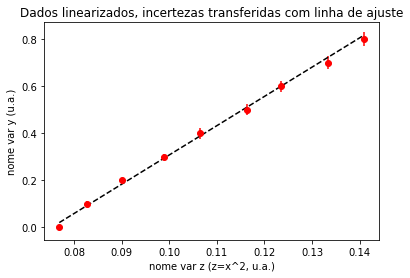

In [16]:
xline = z
yline = fitpars[1] + fitpars[0] * z
plt.errorbar(z, yarray, incytransf,0,'or')
plt.title("Dados linearizados, incertezas transferidas com linha de ajuste")
plt.xlabel("nome var z (z=x^2, u.a.)")
plt.ylabel("nome var y (u.a.)")
#incluindo a linha do ajuste linear, k=preto, '--' = linha tracejada
plt.plot(xline, yline, 'k--')

## Qualidade do ajuste
Existem várias grandezas utilizadas como medida de qualidade do ajuste: $\chi^2_{red}$ (qui-quadrado reduzido), $R^2$ e gráfico de resíduos.



 ### 1. Teste de $\chi^2$ ou $\chi^2_{red}$
 O teste de $\chi^2$ baseia-se na expectativa de que o $\chi^2_{red}$ seja muito próximo do valor 1 (um). Para uma explicação deste teste veja o capítulo 14 da **referência 2**.
 Alguns cuidados devem ser tomados na interpretação de $\chi^2_{red}$. Em geral se os valores se afastam muito de 1 (ou $\chi^2_{red}$>>1 ou $\chi^2_{red}\approx 0$ há problemas. O primeiro dos problemas é com o a estimação da incerteza dos dados experimentais. Quando a subestimação das incertezas o valor de $\chi^2_{red}$ fica artificialmente maior que 1 e o contrário também é verdade, incertezas superestimadas levam a um reduzido valor de $\chi^2_{red}$. O último caso é sempre o sintoma de superestimação de incertezas. No entanto, quando $\chi^2_{red}$>>1 nem sempre o problema é de subestimação de incertezas, mas pode ser que a função ajustada (ou modelo) não é adequado para descrever os dados experimentais (por exemplo, usar uma reta em dados que seriam melhor descritos por um polinômio do segundo grau). Não existe uma única forma para se calcular o $\chi^2_{red}$ com o **scipy**, mas podemos usar o **numpy** com os resultados do _curve\_fit_ :


In [17]:
#calulando chi^2_red
yhat = np.polyval(fitpars, z)
chi_squared = np.sum(((yhat - yarray)/incytransf) ** 2)
chi2_red = chi_squared/(len(z)-2)
chi2_red

1.1175898026757987

### 2. Valor de $R^2$
 O $R^2$ é simplesmente o quadrado do coeficiente de correlação. O coeficiente de correlação, geralmente denotado por $\rho$ (também conhecido como [coeficiente de correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)). Como o valor de $\rho$ é limitado
 $$-1<\rho<1$$
 o valor de $R^2$ quadrado também será limitado ($0<R^2<1$), interpretando-se a qualidade do ajuste como sendo tão melhor quanto mais próxima de 1. No entanto, esse é um equívoco, pois assim como $\rho$, $R^2$ dá uma medida da intensidade da correlação entre os valores $x$ e $y$ dos pontos experimentais. Se o ajuste de reta proposto tiver um coeficiente angular com valor muito baixo comparado ao do coeficiente linear combinado com flutuações dos pontos moderadas (pouco mais de 1%) o valor de $R^2$ pode facilmente cair abaixo de 0.5, o que levaria à uma conclusão possivelmente errônea de má qualidade de ajuste (ou de modelo). Por outro lado, um conjunto de pontos levemente não linear (tipo $x^{3/2}$) pode ser ajustado por uma reta com $R^2$>0.9, indicando erroneamente que o ajuste é bom.
**Portanto deve-se evitar $R^2$ como única medida de qualidade de ajuste.**

O **numpy** não possui um método automático para cálculo de $R^2$, portanto como este valor não é tão importante para o tipo de análise que fazemos no lab, pode-se optar por não determinar esse valor, mas se houver interesse, uma possibilidade é fazer



In [18]:
st = np.sum((yarray - np.mean(yarray))**2)
sr = np.sum((yarray - yhat)**2)
r2 = (st - sr) / st
np.round(r2,4)

0.997

### 3. Gráfico de resíduos

O gráfico de resíduos é sempre uma boa ferramenta e deve sempre que possível ser usada complementarmente a outras medidas de qualidade, principalmente quando se usa $R^2$, que jamais deve ser usado sozinho. 
Para se fazer um gráfico de ajuste faz-se um gráfico com o mesmo eixo $x$ dos dados originais, enquanto que no eixo vertical devem ser colocados os valores da diferença $(\hat{y}-y)$, onde $\hat{y}$ são os valores calculados para cada $x$ a partir dos parâmetros do ajuste.

Um bom ajuste deverá mostrar um gráfico de resíduos com os pontos distribuídos de maneira aleatória acima e abaixo do eixo $x$. Na célula abaixo é apresentada a confecção de um gráfico de resíduos. Os dados usados neste exemplo _parecem_ razoáveis.

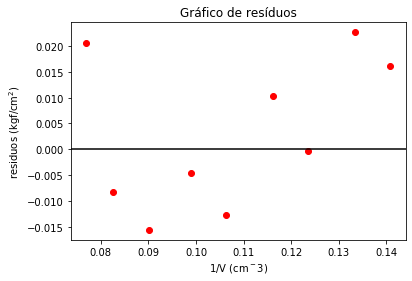

In [19]:
resid = (yhat - yarray)
plt.plot(z, resid, 'or')
plt.title("Gráfico de resíduos")
plt.xlabel("1/V (cm$^-3$)")
plt.ylabel("residuos (kgf/cm$^2$)")
plt.axhline(y=0, color='k', linestyle='-')

## Propagando as incertezas obtidas no ajuste

A teoria nos dá a informação que precisamos para extrair dos parâmetros do ajuste as informações sobre a física envolvida no experimento. Lembrando a equação de Clapeyron:
$$PV = nRT$$
temos que ter em mente que tanto $P$ quanto $T$ são em escala absoluta. $T$ é em kelvin e 
$$P=P_0+P_m$$
onde $P_0$ e $P_m$ são respectivamente as pressões atmosférica e manométrica. Assim a equação de Clapeyron se reescreve
$$(P_0+P_m)V = nRT \Rightarrow P_0+P_m = \frac{nRT}{V}$$ 
resultando numa equação de reta da dependência de $P_m$ em $1/V$
$$P_m = nRT\frac{1}{V} - P_0$$
em comparando-se a um modelo linear (equação de reta) do tipo $y=ax+b$, temos que os parâmetros do ajuste correspondem a grandezas físicas, $a=nRT$ (coeficiente angular) e $b=-P_0$ (coef. linear). Portanto, podemos obter as incertezas das grandezas físicas de interesse a partir das incertezas nos parâmetros do ajuste. No caso da pressão atmosférica, $P_0$ a sua incerteza ($\sigma_{P_0}$) é a própria incerteza do parâmetro correspondente ao coeficiente linear. Neste caso teríamos $P_0$= {{-rp_1}} $\pm$ {{rs_p_1}} kgf/cm$^2$.

No entanto se quisermos saber o número de mols de ar contido no cilindro $n$, teremos que fazer a propagação da incertezas a partir do ajuste. Neste caso o coeficiente angular é $a=nRT$, ou seja, $n$ pode ser obtido por
$$n=\frac{a}{RT}$$
Assim é necessário considerar as incertezas de $a$ (do ajuste) e $T$ (da medida direta). $R$ é uma constante universal tabelada, portanto sem incerteza. A expressão de propagação neste caso então fica
$$\sigma_n^2 = \left(\frac{\partial n}{\partial a}\sigma_a\right)^2 + \left(\frac{\partial n}{\partial T}\sigma_T\right)^2$$

No caso de $n$, como a expressão é linear em $a$ e em $T$ podemos usar a expressão simplificada:
$$\sigma_n = n\sqrt{\left(\frac{\sigma_a}{a}\right)^2+\left(\frac{\sigma_T}{T}\right)^2}$$
Assim,considerando que $T=(25\pm1)^\circ$C o valor de $n$ com sua respectiva incerteza será dado por:

In [20]:
#atencao aas unidades
R=8.3144626 #J/(mol/K)
T=25+273 #kelvin
s_T = 1
a_mod = p_0*(98066.5*1e-6) # [atm/(kgf/cm^2)]*[L/cm^3]
s_a_mod = s_p_0*(98066.5*1e-6) #mudanca de unidades também para a incerteza
n = a_mod/(R*T)
s_n = n*np.sqrt(np.power((s_a_mod/a_mod),2)+np.power(s_T/T,2))
n6 = np.round(n*1e4,2)
sn6 = np.round(s_n*1e4,2)
n

0.0004926514619153663

## Referências

1. Principios de Física - Volume 2,  Raymond A. Serway, John W. Jewett, Jr., Tradução da 5$^a$ Edição Norte-Americana, 2015 (ISBN-10:85-221-1637-7)
2. Fundamentos da Teoria dos Erros, José Henrique Vuolo, 2$^a$ edição, Editora Edgar Blücher, 1996 (ISBN: 85-212-0056-0)